## Rhizopus oryzae
<img src="RhozyMap.png" width="500" />

In [1]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve, minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas
from ipywidgets import interact
# from __future__ import division
%matplotlib inline

In [2]:
data = pandas.read_csv('SMH.csv')
t = data['t'].T
Csugar = data['Cs']
Cfumarate = data['Cf']
Cethanol = data['Ce']
Cmalic = data['Cm']

In [3]:
c, h, o, n = 12, 1, 16, 14
MMs = c + 2*h + o
MMx = c + 1.8*h + 0.5*o + 0.2*n
MMe = c + 3*h + 0.5*o
MMn = n + 3*h
MMf = c + h + o
MMm = c + 1.5*h + 1.25*o
MMe,MMx,MMs,MMn,MMf, MMm

(23.0, 24.6, 30, 17, 29, 33.5)

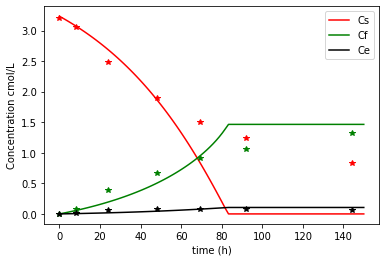

In [4]:
def func (μ_max  = 0.02, θ_max = 0, Kms = 0.5, Kmn = 1,β =0.1):
    def response_fun(C):
        Cx, Cs, Cf, Ce, Cn = C
        if Cs <= 0:
            return [0,0,0,0,0]
        
        else:    
            μ = μ_max* (Cs/ (Kms + Cs))#*((1+ (Cf/Kmn))**(-1))
            θ = θ_max
            Yxu = 0.2

            A1 = np.matrix([[-1, 1+α, 1, 0, 0, 0, 0],
                          [0, 0, -1, 1, 1, 1, 0],
                          [0, -γ, 1/3, -1, 0, 1/3, 2*P_O],
                          [0, β, 1/3, -1/4, -1/2, 2, -2],
                          [1, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0]])


            B1 = np.matrix([[0, 0, θ, 0, r_gluc, μ, r_ethanol]]).T

            r1 = np.linalg.solve(A1,B1)

            return[r1[1,0],
              -r1[0,0],
              r1[3,0],
              r1[4,0],
                  -Yxu*r1[1,0]]

    def ferm_eq(C,t):
        Cx, Cs, Cf, Ce, Cn = C[0],C[1], C[2], C[3], C[4]

        r=response_fun([Cx, Cs, Cf, Ce, Cn])     

        return [r[0]*Cx,
                r[1]*Cx,
                r[2]*Cx,
                r[3]*Cx,
                r[4]*Cx,]
    
    
    α, γ, P_O= 0.1, 2.5, 1.5#, μ_max, 0.1, θ, 0, 
    r_gluc = ((100-20)/((0.45/(0.05))*145))*(MMx/MMs) #cx,massx,50ml,time#
    r_ethanol =((2-0)/((0.45/(0.05))*145))*(MMx/MMe)
    Cso,Cxo,Cno,Cfo,Ceo = 97/MMs, 0.45/(0.05*MMx), 0.16*0.15/MMn, 0, 0

    Co=[Cxo, Cso, Cfo,Ceo, Cno]                     # [Cxo, Cso, Cfo, Ceo,Cno] in cmol/L
    tspan=np.linspace(0,150 ,100)           # define the timespan of the integration
    Ci = odeint(ferm_eq, Co, tspan)             # integration via odeint that calls apon ferm_eq

    Cx, Cs, Cf, Ce, Cn = Ci.T

    plt.figure(1)
    plt.plot(tspan, Cs, color='red', label='Cs')
    plt.plot(t, Csugar, '*', color='red')
    
    plt.plot(tspan, Cf, color='green', label='Cf')
    plt.plot(t, Cfumarate, '*', color='green')
    
    plt.plot(tspan, Ce, color='black', label='Ce')
    plt.plot(t, Cethanol, '*', color='black')
    
#     plt.plot(tspan, Cm, color='black', label='Cm')
#     plt.plot(t, Cmalic, '*', color='blue')

    plt.legend(loc='best')
    plt.ylabel('Concentration cmol/L') 
    plt.xlabel('time (h)') 

    
interact(func, μ_max  = (0,2,0.05), θ_max = (0,10,0.05), Kms = (0, 3.3, 0.01),Kmn =  (0,1.3,0.01),β = (0,3,0.01))
plt.show()

###### Figure 3 Fermentation Kinetics of SMH 20 v/v (Kun Zhang 2015)
<img src="smh20.png" width="450" />
